In [ ]:
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link='https://drive.google.com/file/d/17XkmsJDmhCpUmow-92a7Z8mto5fDCQgW/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Building_Permits.csv') 

NameError: ignored

In [ ]:
#add colum Wait_Time = issue_dt - file_dt
issue_dt = pd.to_datetime(df['Issued Date'],errors='coerce')
#print(issue_dt) 
file_dt = pd.to_datetime(df['Filed Date'],errors='coerce')
#print(file_dt)
df['Wait_Time'] = issue_dt - file_dt
#print(dataset['Wait_Time'])
url='https://drive.google.com/file/d/1v6bObg99C_8qlY4E4srsdqtgV8LSN1wG/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df.to_csv(dwn_url)


TypeError: ignored

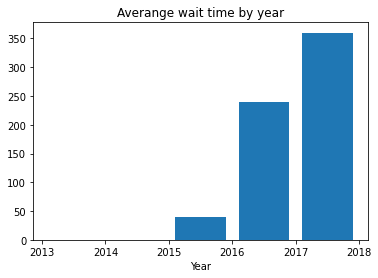

In [ ]:
year = pd.to_datetime(df['Current Status Date'],errors='coerce').dt.year
df['Year'] = year
df.to_csv('Building_Permits.csv')
wait_time = pd.to_numeric(df['Year'],errors='coerce').groupby(df['Wait_Time'])
x= wait_time.mean()
y=np.array([2013,2014,2015,2016,2017,2018])
plt.hist(x,y, histtype='bar',rwidth=0.8)
plt.xlabel('Year')
plt.title('Averange wait time by year')
plt.show()

In [ ]:
#Câu 5
import pandas as pd

url='https://drive.google.com/file/d/1v6bObg99C_8qlY4E4srsdqtgV8LSN1wG/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
#df.describe()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
url='https://drive.google.com/file/d/1v6bObg99C_8qlY4E4srsdqtgV8LSN1wG/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01301E+11,4,sign - erect,1/2/2013,1539,3,4141,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,4/29/2014,1/2/2013,7/15/2013,4/29/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/10/2014,10000.0,10000.0,clinics-medic/dental,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,NaN,1.0,Inner Richmond,94118.0,POINT (-122.46370669566068 37.78043489558403),1.292120e+12
1,2.01301E+11,4,sign - erect,1/2/2013,1095,5,2425,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,5/2/2014,1/2/2013,7/8/2013,5/2/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/3/2014,10000.0,10000.0,hospital,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,NaN,2.0,Lone Mountain/USF,94115.0,POINT (-122.44313634259956 37.7823149205132),1.292120e+11
2,M364247,8,otc alterations permit,1/2/2013,499,001A,2757,NaN,Polk,St,NaN,NaN,street space,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,POINT (-122.42331798344719 37.80216598051278),1.292120e+11
3,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,580,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
4,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,588,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12


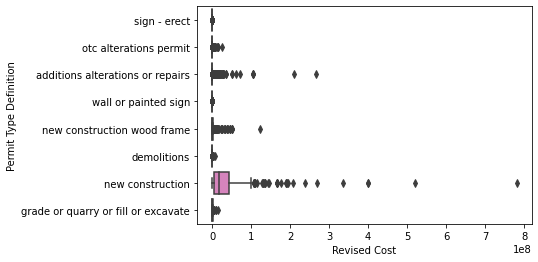

In [ ]:
sns.boxplot(x='Revised Cost',y='Permit Type Definition',data=df)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.savefig('PermitTypeDefinition_RevisedCost.png')

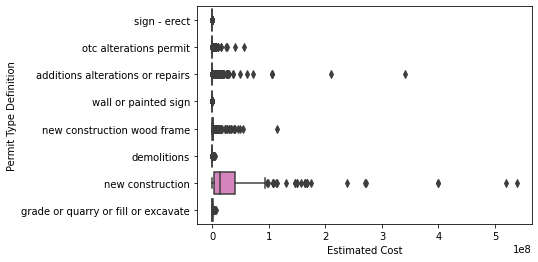

In [ ]:
sns.boxplot(x='Estimated Cost',y='Permit Type Definition',data=df)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.savefig('PermitTypeDefinition_EstimateCost.png')

giá dự tính đối với loại giấy phép

In [ ]:
#Câu 6:
df.dtypes
df.isnull().sum().sort_values(ascending=False)

TIDF Compliance                           198849
Voluntary Soft-Story Retrofit             198816
Unit Suffix                               196889
Street Number Suffix                      196493
First Construction Document Date          195024
Site Permit                               193416
Structural Notification                   191753
Fire Only Permit                          180017
Unit                                      169407
Completed Date                             84280
Existing Units                             51433
Proposed Units                             50801
Permit Expiration Date                     46571
Existing Construction Type                 43197
Existing Construction Type Description     43197
Proposed Construction Type Description     42988
Proposed Construction Type                 42987
Number of Proposed Stories                 42694
Number of Existing Stories                 42617
Proposed Use                               42257
Existing Use        

In [ ]:
df.isnull().sum().sort_values(ascending=False)
for column in df.columns:
  percent=df[column].isnull().mean()
  print(f'{column}:{round(percent*100,3)}')

Permit Number:0.0
Permit Type:0.0
Permit Type Definition:0.0
Permit Creation Date:0.0
Block:0.0
Lot:0.0
Street Number:0.0
Street Number Suffix:98.814
Street Name:0.0
Street Suffix:1.393
Unit:85.193
Unit Suffix:99.013
Description:0.088
Current Status:0.004
Current Status Date:0.004
Filed Date:0.004
Issued Date:4.858
Completed Date:42.383
First Construction Document Date:98.075
Structural Notification:96.43
Number of Existing Stories:21.432
Number of Proposed Stories:21.47
Voluntary Soft-Story Retrofit:99.982
Fire Only Permit:90.529
Permit Expiration Date:23.42
Estimated Cost:19.055
Revised Cost:1.751
Existing Use:20.589
Existing Units:25.865
Proposed Use:21.251
Proposed Units:25.547
Plansets:18.755
TIDF Compliance:99.999
Existing Construction Type:21.723
Existing Construction Type Description:21.723
Proposed Construction Type:21.618
Proposed Construction Type Description:21.618
Site Permit:97.267
Supervisor District:0.848
Neighborhoods - Analysis Boundaries:0.848
Zipcode:0.011
Location:

%null các cột dữ liệu


In [ ]:
#1. drop column
df.drop('TIDF Compliance', axis = 1)
df.drop('Voluntary Soft-Story Retrofit', axis = 1)
df.drop('Street Number Suffix', axis = 1)
df.drop('Unit Suffix', axis = 1)
df.drop('First Construction Document Date', axis = 1)
df.drop('Structural Notification', axis = 1)
df.drop('Fire Only Permit', axis = 1)
df.drop('Site Permit', axis = 1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01301E+11,4,sign - erect,1/2/2013,1539,3,4141,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,4/29/2014,1/2/2013,7/15/2013,4/29/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/10/2014,10000.0,10000.0,clinics-medic/dental,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,1.0,Inner Richmond,94118.0,POINT (-122.46370669566068 37.78043489558403),1.292120e+12
1,2.01301E+11,4,sign - erect,1/2/2013,1095,5,2425,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,5/2/2014,1/2/2013,7/8/2013,5/2/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/3/2014,10000.0,10000.0,hospital,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,2.0,Lone Mountain/USF,94115.0,POINT (-122.44313634259956 37.7823149205132),1.292120e+11
2,M364247,8,otc alterations permit,1/2/2013,499,001A,2757,NaN,Polk,St,NaN,NaN,street space,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,POINT (-122.42331798344719 37.80216598051278),1.292120e+11
3,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,580,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
4,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,588,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198846,2.01802E+11,3,additions alterations or repairs,2/23/2018,6561,024A,4363,NaN,26th,St,NaN,NaN,vertical & horizontal additions to include: ba...,issued,12/23/2019,2/23/2018,12/23/2019,NaN,12/4/2020,Y,2.0,2.0,NaN,NaN,12/23/2021,650000.0,759000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5,wood frame (5),8.0,Noe Valley,94131.0,POINT (-122.43734796381953 37.747635521194084),1.498180e+12
198847,2.01802E+11,8,otc alterations permit,2/23/2018,260,15,465,NaN,California,St,NaN,NaN,"interior ti revision to 201710110969, reductio...",complete,7/26/2018,2/23/2018,4/2/2018,7/26/2018,NaN,NaN,17.0,17.0,NaN,NaN,3/28/2019,1.0,1.0,food/beverage hndlng,0.0,food/beverage hndlng,0.0,2.0,NaN,2.0,constr type 2,2,constr type 2,3.0,Financial District/South Beach,94104.0,POINT (-122.40212913835718 37.79257170128446),1.498190e+11
198848,2.01802E+11,8,otc alterations permit,2/23/2018,2683,11,337,NaN,Warren,Dr,NaN,NaN,change five front windows to wood clad sierra ...,complete,5/11/2018,2/23/2018,2/23/2018,5/11/2018,NaN,NaN,3.0,3.0,NaN,NaN,2/18/2019,8000.0,8000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),7.0,Inner Sunset,94131.0,POINT (-122.46167613457283 37.75532455145908),1.498210e+12
198849,2.01802E+11,3,additions alterations or repairs,2/23/2018,3753,75,268,NaN,Clara,St,NaN,NaN,"remove wall, door and plumbing fixtures at bat...",filed,2

In [ ]:
mode = df['Unit'].mode()
df[df['Unit'].isnull()].fillna(mode, inplace=True)
mode = df['Completed Date'].mode()
df[df['Completed Date'].isnull()].fillna(mode, inplace=True)
mode = df['Number of Existing Stories'].mode()
df[df['Number of Existing Stories'].isnull()].fillna(mode, inplace=True)
mode = df['Number of Proposed Stories'].mode()
df[df['Number of Proposed Stories'].isnull()].fillna(mode, inplace=True)
mode = df['Permit Expiration Date'].mode()
df[df['Permit Expiration Date'].isnull()].fillna(mode, inplace=True)
mode = df['Estimated Cost'].mode()
df[df['Estimated Cost'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Use'].mode()
df[df['Existing Use'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Units'].mode()
df[df['Existing Units'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Use'].mode()
df[df['Proposed Use'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Units'].mode()
df[df['Proposed Units'].isnull()].fillna(mode, inplace=True)
mode = df['Plansets'].mode()
df[df['Plansets'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Construction Type'].mode()
df[df['Existing Construction Type'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Construction Type Description'].mode()
df[df['Existing Construction Type Description'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Construction Type'].mode()
df[df['Proposed Construction Type'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Construction Type Description'].mode()
df[df['Proposed Construction Type Description'].isnull()].fillna(mode, inplace=True)

In [ ]:
# drop row
no_StreetSuffix = df[df['Street Suffix'].isnull()].index
df.drop(no_StreetSuffix,axis=0)
no_Description = df[df['Description'].isnull()].index
df.drop(no_Description,axis=0)
no_CurrentStatus = df[df['Current Status'].isnull()].index
df.drop(no_CurrentStatus,axis=0)
no_CurrentStatusDate = df[df['Current Status Date'].isnull()].index
df.drop(no_CurrentStatusDate,axis=0)
no_FiledDate = df[df['Filed Date'].isnull()].index
df.drop(no_FiledDate,axis=0)
no_IssuedDate = df[df['Issued Date'].isnull()].index
df.drop(no_IssuedDate,axis=0)
no_RevisedCost = df[df['Revised Cost'].isnull()].index
df.drop(no_RevisedCost,axis=0)
no_SupervisorDistrict = df[df['Supervisor District'].isnull()].index
df.drop(no_SupervisorDistrict,axis=0)
no_Neighborhoods_Analysis_Boundaries = df[df['Neighborhoods - Analysis Boundaries'].isnull()].index
df.drop(no_Neighborhoods_Analysis_Boundaries,axis=0)
no_Zipcode = df[df['Zipcode'].isnull()].index
df.drop(no_Zipcode,axis=0)
no_Location = df[df['Location'].isnull()].index
df.drop(no_Location,axis=0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01301E+11,4,sign - erect,1/2/2013,1539,3,4141,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,4/29/2014,1/2/2013,7/15/2013,4/29/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/10/2014,10000.0,10000.0,clinics-medic/dental,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,NaN,1.0,Inner Richmond,94118.0,POINT (-122.46370669566068 37.78043489558403),1.292120e+12
1,2.01301E+11,4,sign - erect,1/2/2013,1095,5,2425,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,5/2/2014,1/2/2013,7/8/2013,5/2/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/3/2014,10000.0,10000.0,hospital,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,NaN,2.0,Lone Mountain/USF,94115.0,POINT (-122.44313634259956 37.7823149205132),1.292120e+11
2,M364247,8,otc alterations permit,1/2/2013,499,001A,2757,NaN,Polk,St,NaN,NaN,street space,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,POINT (-122.42331798344719 37.80216598051278),1.292120e+11
3,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,580,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
4,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,588,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198846,2.01802E+11,3,additions alterations or repairs,2/23/2018,6561,024A,4363,NaN,26th,St,NaN,NaN,vertical & horizontal additions to include: ba...,issued,12/23/2019,2/23/2018,12/23/2019,NaN,12/4/2020,Y,2.0,2.0,NaN,NaN,12/23/2021,650000.0,759000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5,wood frame (5),Y,8.0,Noe Valley,94131.0,POINT (-122.43734796381953 37.747635521194084),1.498180e+12
198847,2.01802E+11,8,otc alterations permit,2/23/2018,260,15,465,NaN,California,St,NaN,NaN,"interior ti revision to 201710110969, reductio...",complete,7/26/2018,2/23/2018,4/2/2018,7/26/2018,NaN,NaN,17.0,17.0,NaN,NaN,3/28/2019,1.0,1.0,food/beverage hndlng,0.0,food/beverage hndlng,0.0,2.0,NaN,2.0,constr type 2,2,constr type 2,NaN,3.0,Financial District/South Beach,94104.0,POINT (-122.40212913835718 37.79257170128446),1.498190e+11
198848,2.01802E+11,8,otc alterations permit,2/23/2018,2683,11,337,NaN,Warren,Dr,NaN,NaN,change five front windows to wood clad sierra ...,complete,5/11/2018,2/23/2018,2/23/2018,5/11/2018,NaN,NaN,3.0,3.0,NaN,NaN,2/18/2019,8000.0,8000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,7.0,Inner Sunset,94131.0,POINT (-122.46167613457283 37.75532455145908),1.498210e+12
198849,2.01802E+11,3,additions alterations or repairs,2/23/2018,3753,75,268,NaN,Clara,St,NaN,NaN,"remove wall,

In [ ]:
#Câu 7:
import pandas as pd
import numpy as np
df=pd.read_csv('Building_Permits.csv',encoding='utf-8')
df.count()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Permit Number                             198851
Permit Type                               198851
Permit Type Definition                    198851
Permit Creation Date                      198851
Block                                     198851
Lot                                       198851
Street Number                             198851
Street Number Suffix                        2358
Street Name                               198851
Street Suffix                             196081
Unit                                       29444
Unit Suffix                                 1962
Description                               198677
Current Status                            198844
Current Status Date                       198844
Filed Date                                198844
Issued Date                               189190
Completed Date                            114571
First Construction Document Date            3827
Structural Notification                     7098
Number of Existing S

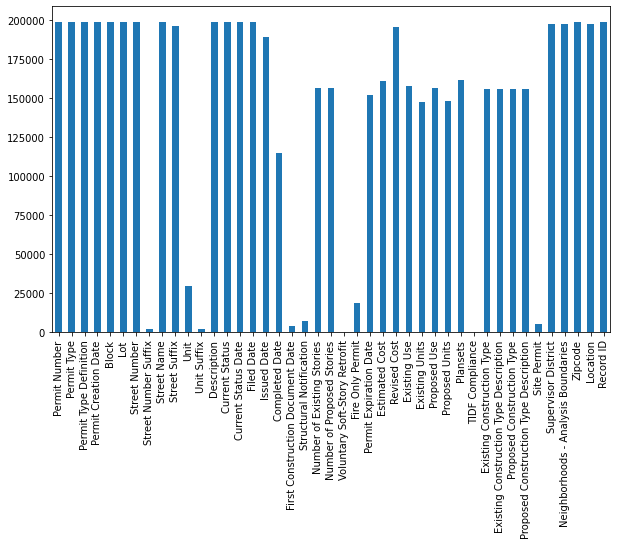

In [ ]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
df.count().plot(kind="bar")

In [ ]:
#Câu 8:
import pandas as pd
import numpy as np
df=pd.read_csv('Building_Permits.csv',encoding='utf-8')
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Permit Number, Permit Type, Permit Type Definition, Permit Creation Date, Block, Lot, Street Number, Street Number Suffix, Street Name, Street Suffix, Unit, Unit Suffix, Description, Current Status, Current Status Date, Filed Date, Issued Date, Completed Date, First Construction Document Date, Structural Notification, Number of Existing Stories, Number of Proposed Stories, Voluntary Soft-Story Retrofit, Fire Only Permit, Permit Expiration Date, Estimated Cost, Revised Cost, Existing Use, Existing Units, Proposed Use, Proposed Units, Plansets, TIDF Compliance, Existing Construction Type, Existing Construction Type Description, Proposed Construction Type, Proposed Construction Type Description, Site Permit, Supervisor District, Neighborhoods - Analysis Boundaries, Zipcode, Location, Record ID]
Index: []
